# **Air Quality Index (AQI) Prediction Using Machine Learning**

This project predicts Air Quality Index (AQI) using pollutant concentration data. The model helps understand environmental pollution trends and supports urban environmental monitoring.

Student Name: Aaditya Acharya
Student ID: 2510333

##  **SDG Alignment**

### **SDG 11 - Sustainable Cities and Communities**

This project helps monitor environmental pollution levels and supports decision-making for urban environmental planning.


## **Importing required libraries and loading dataset**

In [33]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [34]:
df=pd.read_csv("city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


##  **Initial Data Exploration**

Checking dataset structure, missing values, and data types.


In [35]:
df.info(),df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


(None,
 City              0
 Date              0
 PM2.5          4598
 PM10          11140
 NO             3582
 NO2            3585
 NOx            4185
 NH3           10328
 CO             2059
 SO2            3854
 O3             4022
 Benzene        5623
 Toluene        8041
 Xylene        18109
 AQI            4681
 AQI_Bucket     4681
 dtype: int64)

##  **Data Cleaning**

 - Rows missing AQI values are removed because they cannot be used for model training as AQI is the target variable


### **Handling Missing Pollution Values**

Missing pollutant values are filled using city-wise mean values to maintain regional pollution characteristics.

In [36]:
df=df.dropna(subset=['AQI'])
cols = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
df.loc[:, cols] = df.loc[:, cols].fillna(df.groupby('City')[cols].transform('mean'))
df.isna().sum()

City              0
Date              0
PM2.5             0
PM10           1893
NO                0
NO2               0
NOx             771
NH3            1334
CO                0
SO2               0
O3              153
Benzene        2259
Toluene        4084
Xylene        12381
AQI               0
AQI_Bucket        0
dtype: int64

### **Filling Remaining Missing Values Using Date-Based Mean**

Remaining missing values are filled using daily average pollution levels.


In [37]:
df.loc[:, "Date"] = pd.to_datetime(df["Date"], errors="coerce")
missing_columns=['PM10','NOx','NH3','O3','Benzene','Toluene','Xylene']
df.loc[:, missing_columns]=df.loc[:, missing_columns].fillna(df.groupby('Date')[missing_columns].transform('mean'))
df.isna().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

### **Checking Duplicate Records**



In [38]:
df.duplicated().sum()

np.int64(0)

##  **Dataset Summary**


In [39]:
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())

(24850, 16)
         City                 Date   PM2.5        PM10     NO    NO2    NOx  \
28  Ahmedabad  2015-01-29 00:00:00   83.13  112.786826   6.93  28.71  33.72   
29  Ahmedabad  2015-01-30 00:00:00   79.84  112.786826  13.85  28.68  41.08   
30  Ahmedabad  2015-01-31 00:00:00   94.52  112.786826  24.39  32.66  52.61   
31  Ahmedabad  2015-02-01 00:00:00  135.99  112.786826  43.48  42.08  84.57   
32  Ahmedabad  2015-02-02 00:00:00  178.33  112.786826  54.56  35.31  72.80   

      NH3     CO    SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
28  62.03   6.93  49.52   59.76     0.02     0.00    3.14  209.0       Poor  
29  69.78  13.85  48.49   97.07     0.04     0.00    4.81  328.0  Very Poor  
30  67.66  24.39  67.39  111.33     0.24     0.01    7.67  514.0     Severe  
31  96.69  43.48  75.23  102.70     0.40     0.04   25.87  782.0     Severe  
32  84.49  54.56  55.04  107.38     0.46     0.06   35.61  914.0     Severe  
<class 'pandas.core.frame.DataFrame'>
Index: 

##  **AQI Distribution Visualization**


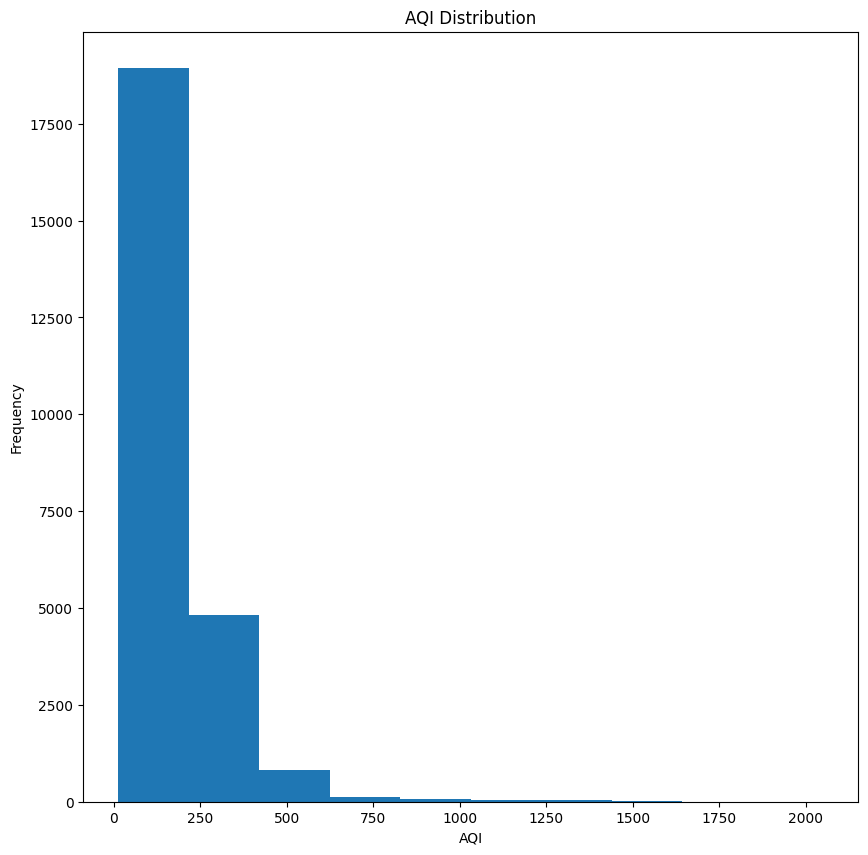

In [40]:
plt.figure(figsize = (10,10))
plt.hist(df['AQI'], bins=10)
plt.title("AQI Distribution")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()

## **Correlation Analysis**

Analyzing relationship between pollutants and AQI.


In [41]:
cols = ['PM2.5','PM10','NO2','CO','SO2','O3']
correlation=df.corr(numeric_only=True)["AQI"][cols]
print(correlation)

PM2.5    0.656089
PM10     0.528956
NO2      0.535185
CO       0.677250
SO2      0.485447
O3       0.196768
Name: AQI, dtype: float64


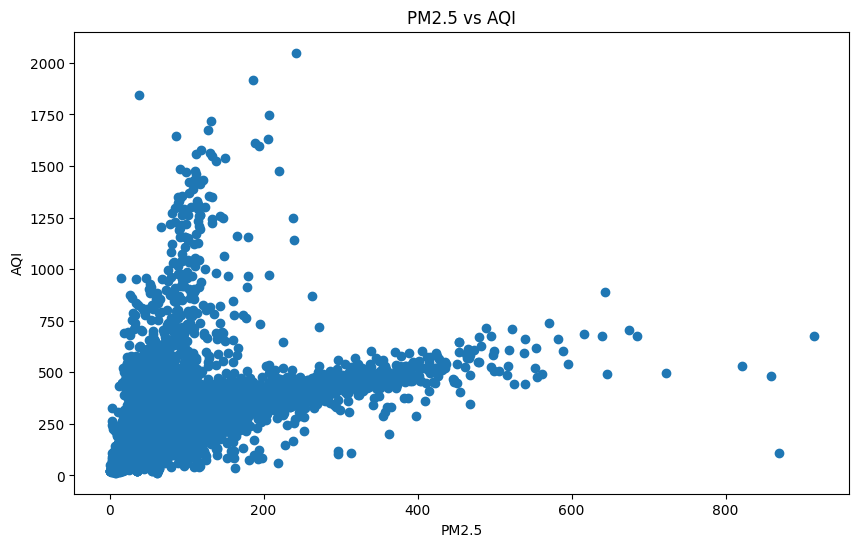

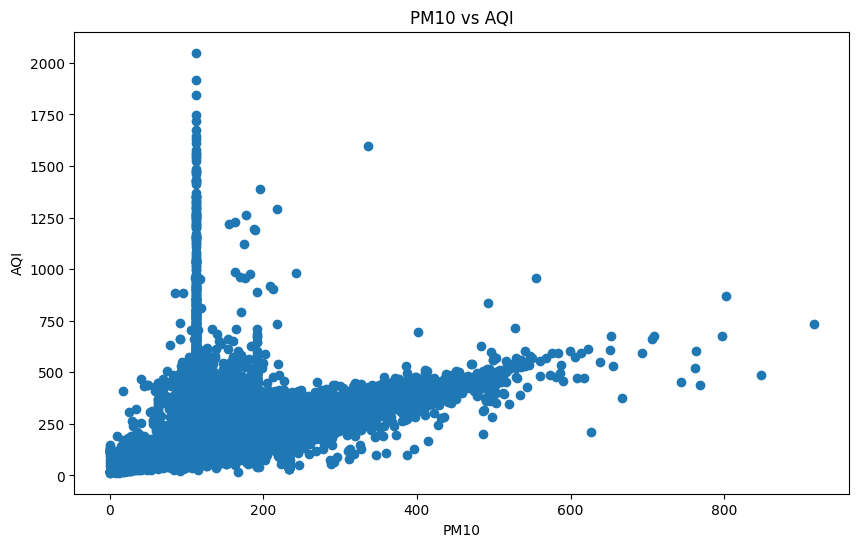

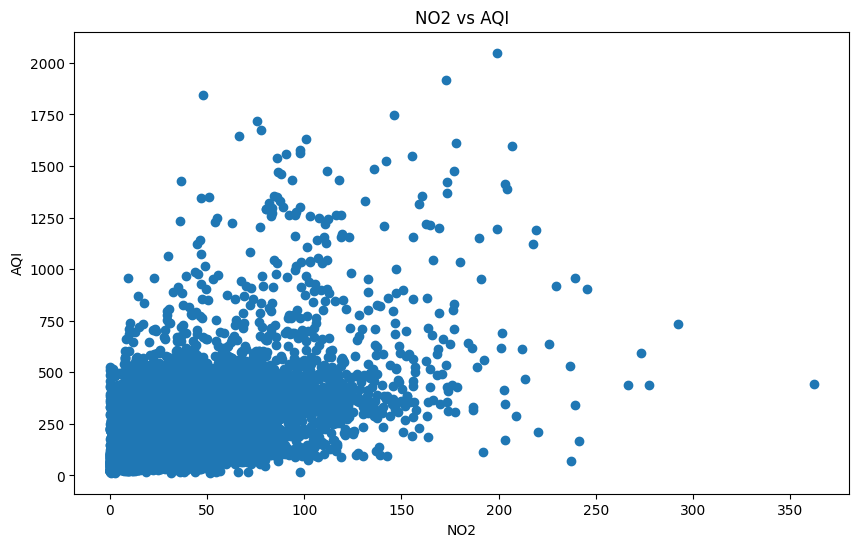

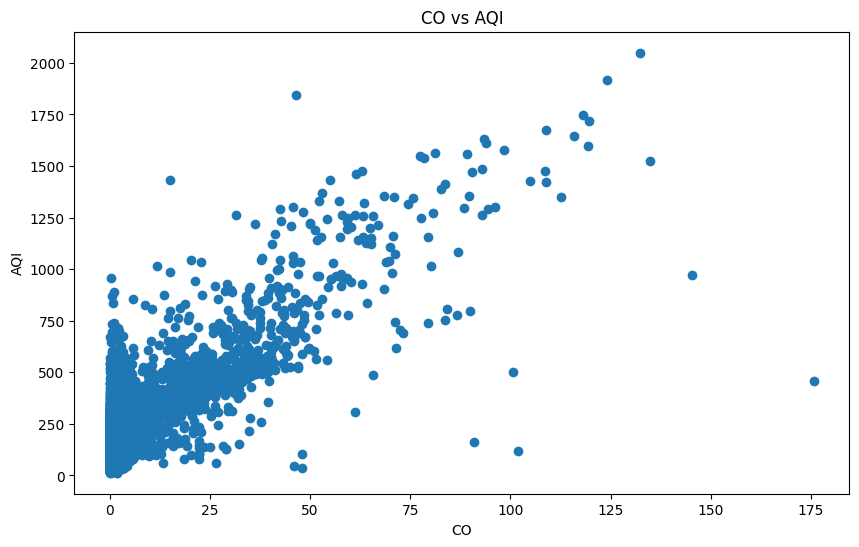

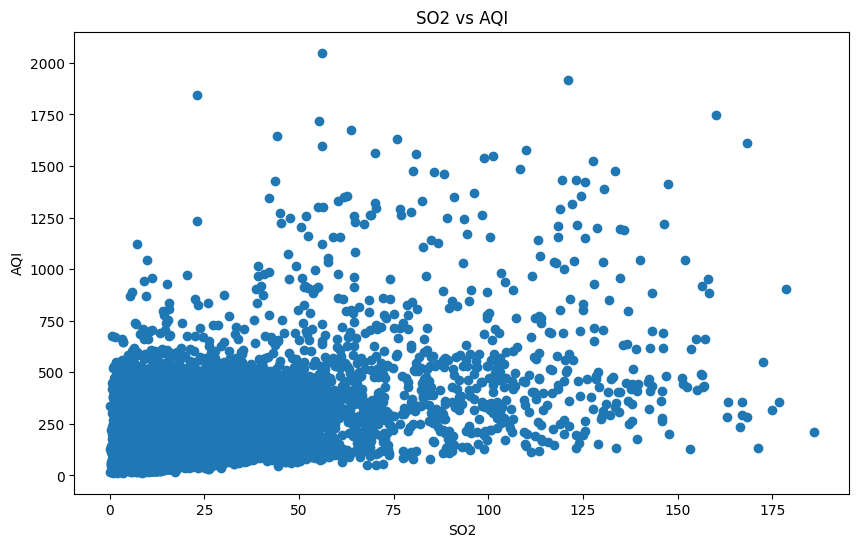

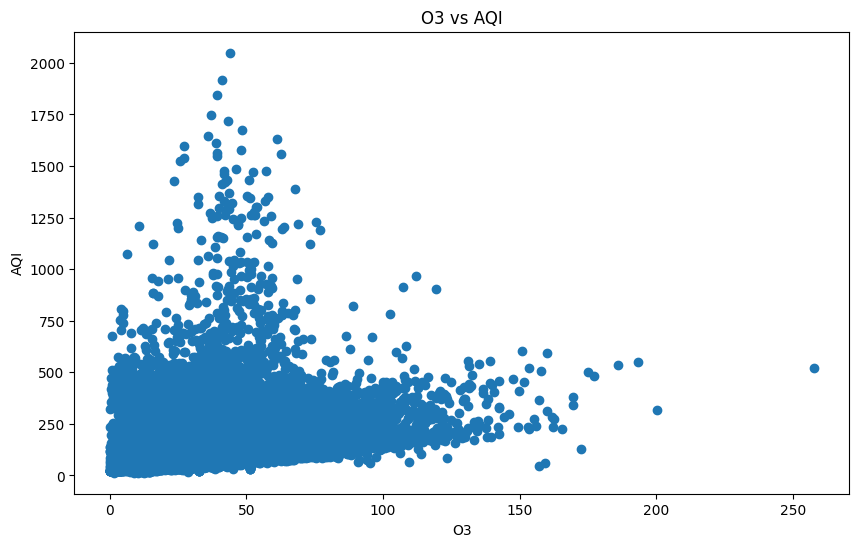

In [42]:
for col in cols:
    plt.figure(figsize=(10,6))
    plt.scatter(df[col], df['AQI'])
    plt.xlabel(col)
    plt.ylabel("AQI")
    plt.title(f"{col} vs AQI")
    plt.show()

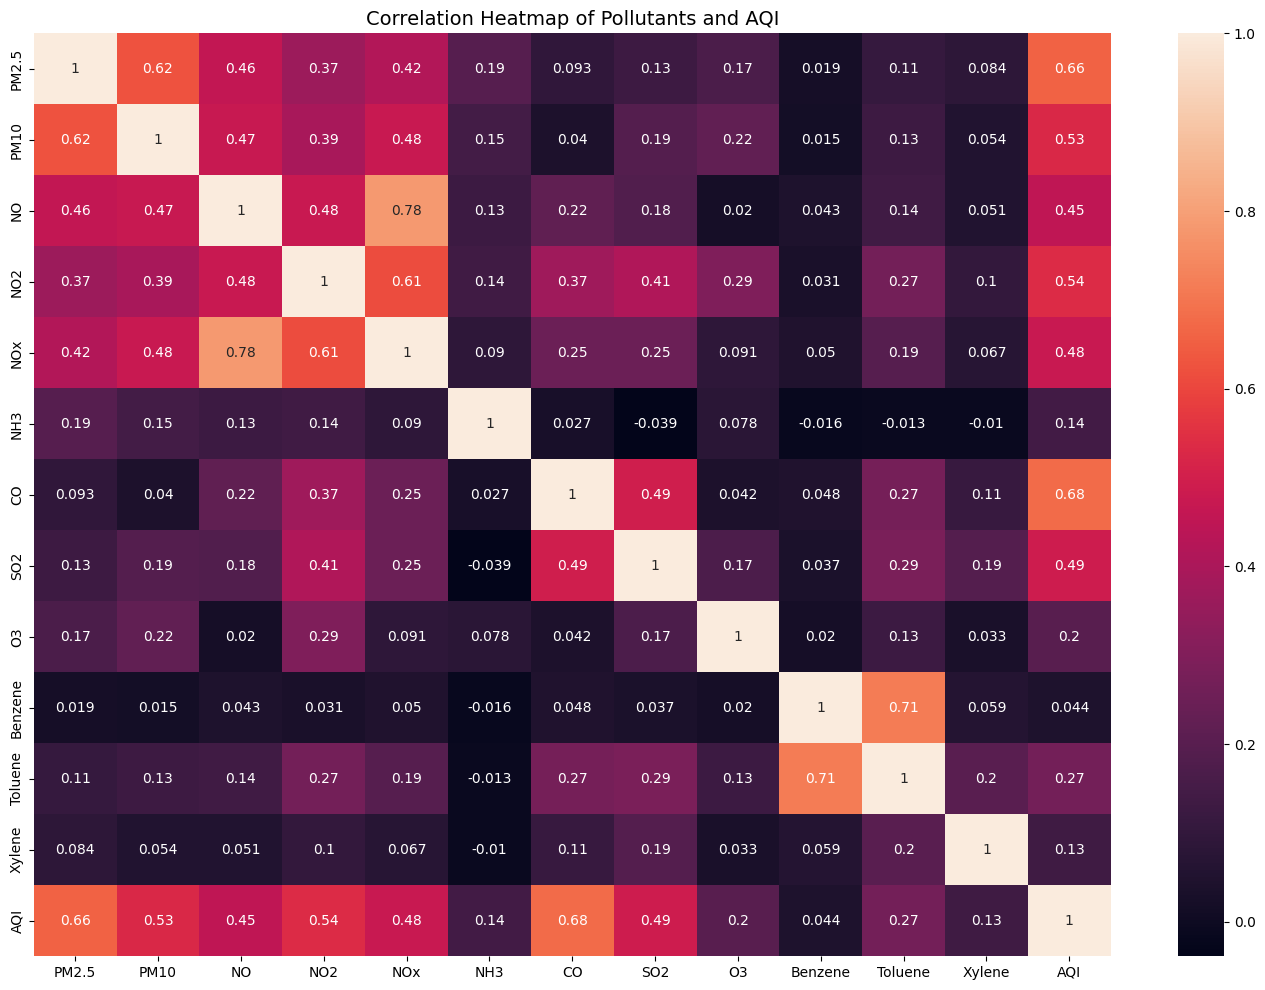

In [43]:
import seaborn as sns

plt.figure(figsize=(14, 10))
corr_matrix = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap of Pollutants and AQI', fontsize=14)
plt.tight_layout()
plt.show()

## **Outlier Detection**

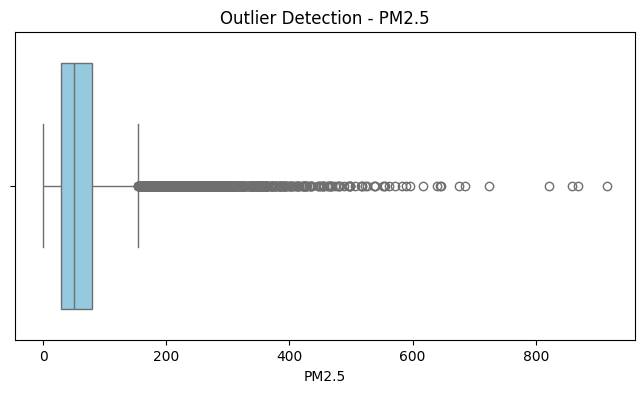

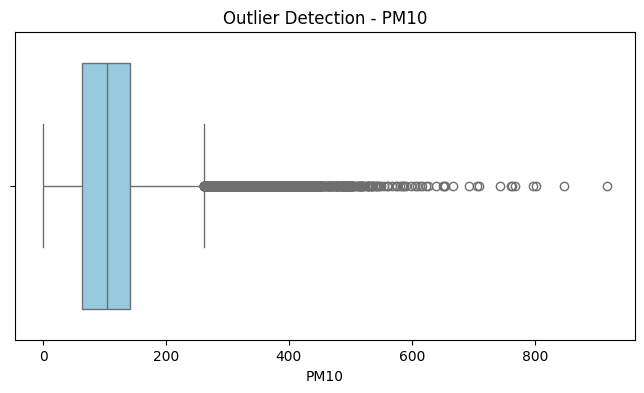

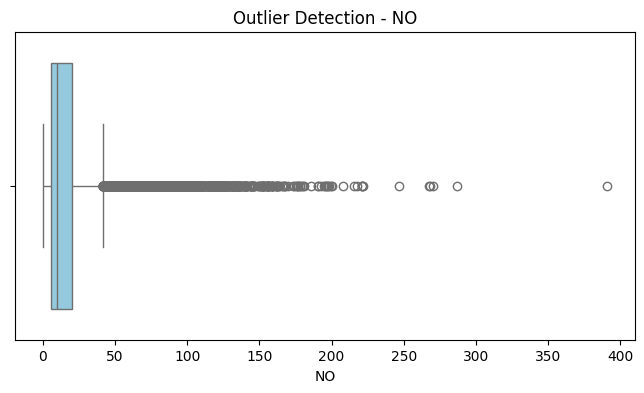

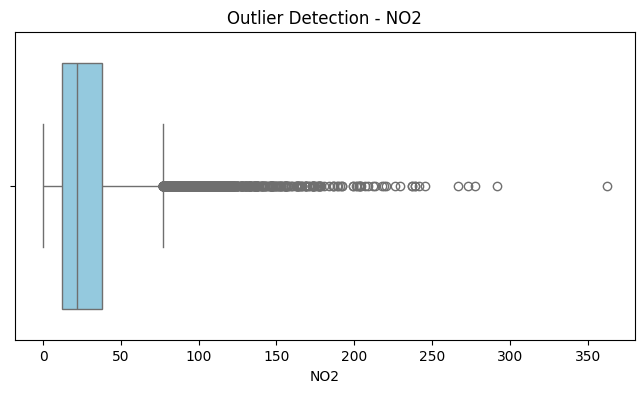

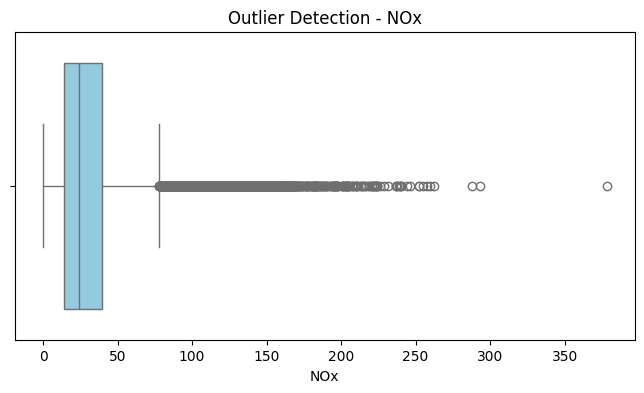

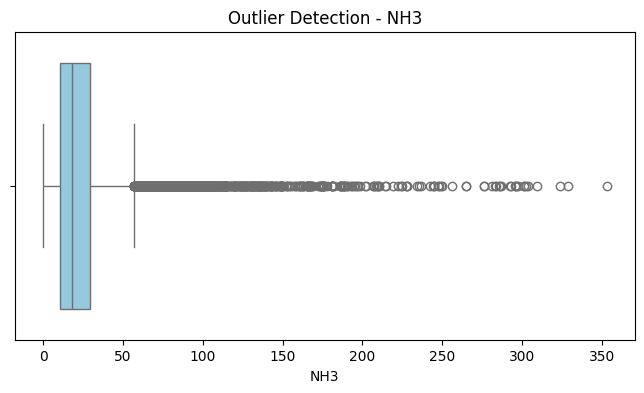

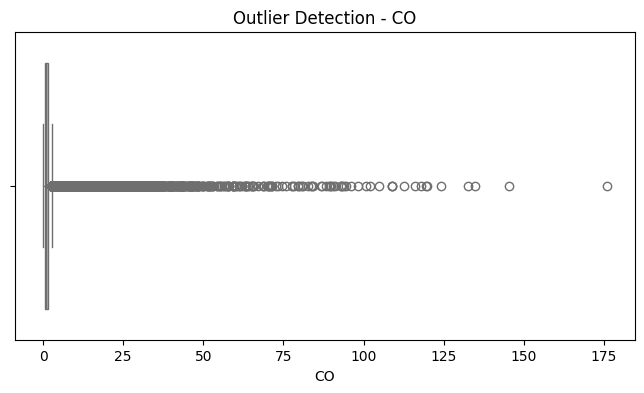

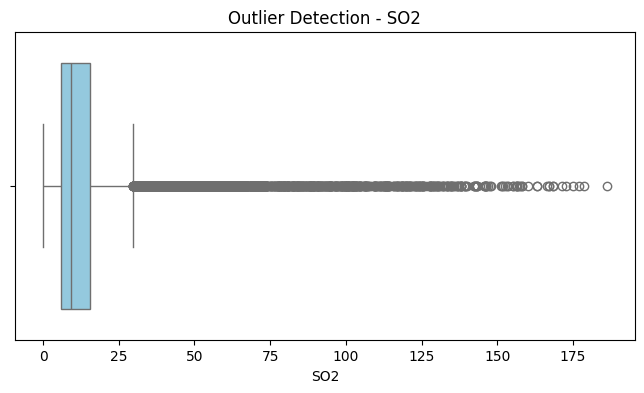

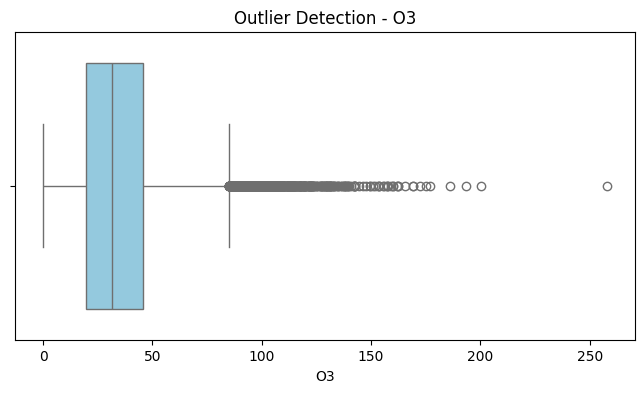

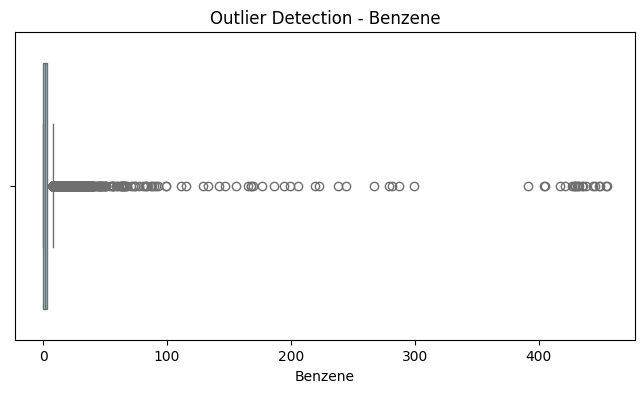

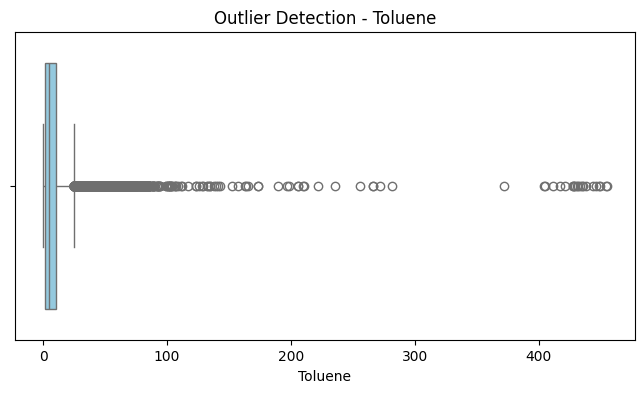

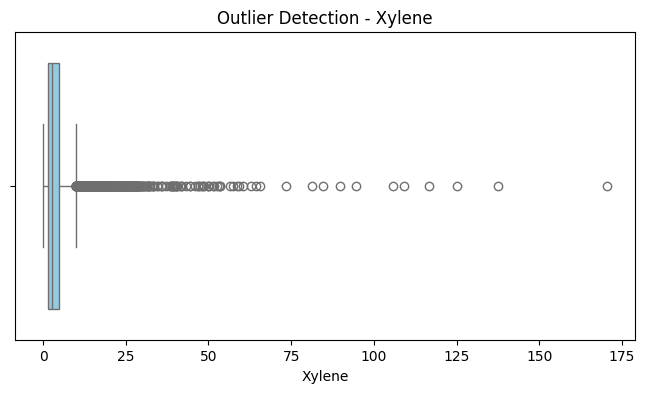

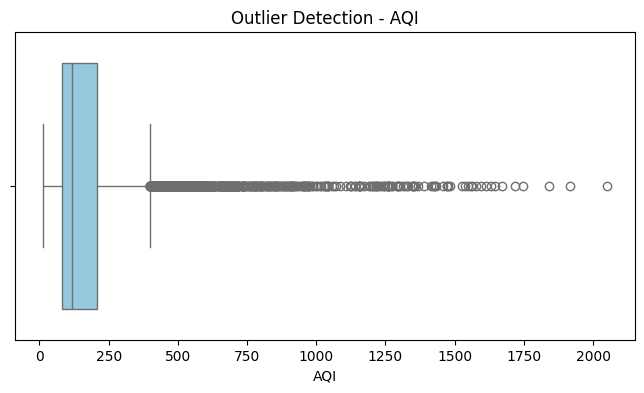

In [44]:

outlier_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

for col in outlier_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Outlier Detection - {col}')
    plt.xlabel(col)
    plt.show()

## **Outlier Treatment**

In [45]:
numeric_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']


for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df.loc[:, col] = df[col].clip(lower=lower, upper=upper)
    outliers = ((df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)).sum()
    print(f"  {col}: {outliers}")

  PM2.5: 0
  PM10: 0
  NO: 0
  NO2: 0
  NOx: 0
  NH3: 0
  CO: 0
  SO2: 0
  O3: 0
  Benzene: 0
  Toluene: 0
  Xylene: 0
  AQI: 0


##  **Target Separation**


In [46]:
df=df.drop(columns=['City','Date','AQI_Bucket'])
x=df.drop(columns=['AQI'])
y=df['AQI']

##  **Train-Test Split and Feature Scaling**


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

##  **Multi Layer Perceptron Model**
Training neural network and evaluating performance.

In [48]:
mlp  = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='adaptive',
    max_iter=300,
    early_stopping=True,
    random_state=42
)
mlp.fit(x_train_scaled, y_train)
y_train_pred = mlp.predict(x_train_scaled)
y_test_pred = mlp.predict(x_test_scaled)


In [64]:
mlp_train_mse = mean_squared_error(y_train, y_train_pred)
mlp_test_mse = mean_squared_error(y_test, y_test_pred)

mlp_train_mae = mean_absolute_error(y_train, y_train_pred)
mlp_test_mae = mean_absolute_error(y_test, y_test_pred)

mlp_train_rmse = np.sqrt(mlp_train_mse)
mlp_test_rmse = np.sqrt(mlp_test_mse)

mlp_train_r2 = r2_score(y_train, y_train_pred)
mlp_test_r2 = r2_score(y_test, y_test_pred)

print("Training Performance:")
print(f"MSE: {mlp_train_mse:.2f}")
print(f"MAE: {mlp_train_mae:.2f}")
print(f"RMSE: {mlp_train_rmse:.2f}")
print(f"R² Score: {mlp_train_r2:.2f}")

print("\nTest Performance:")
print(f"MSE: {mlp_test_mse:.2f}")
print(f"MAE: {mlp_test_mae:.2f}")
print(f"RMSE: {mlp_test_rmse:.2f}")
print(f"R² Score: {mlp_test_r2:.2f}")


Training Performance:
MSE: 124.52
MAE: 7.06
RMSE: 11.16
R² Score: 0.99

Test Performance:
MSE: 905.34
MAE: 19.16
RMSE: 30.09
R² Score: 0.92


##  **Linear Regression Model**


In [65]:
lr=LinearRegression()
lr.fit(x_train_scaled, y_train)
y_train_pred = lr.predict(x_train_scaled)
y_test_pred = lr.predict(x_test_scaled)

In [66]:
train_mse_lr = mean_squared_error(y_train, y_train_pred)
test_mse_lr = mean_squared_error(y_test, y_test_pred)

train_rmse_lr = np.sqrt(train_mse_lr)
test_rmse_lr = np.sqrt(test_mse_lr)

train_mae_lr=mean_absolute_error(y_train, y_train_pred)
test_mae_lr=mean_absolute_error(y_test, y_test_pred)

train_r2_lr = r2_score(y_train, y_train_pred)
test_r2_lr = r2_score(y_test, y_test_pred)

print("Training Performance:")
print(f"MSE: {train_mse_lr:.2f}")
print(f"RMSE: {train_rmse_lr:.2f}")
print(f"MAE: {train_mae_lr:.2f}")
print(f"R² Score: {train_r2_lr:.2f}")

print("\nTest Performance:")
print(f"MSE: {test_mse_lr:.2f}")
print(f"RMSE: {test_rmse_lr:.2f}")
print(f"MAE: {test_mae_lr:.2f}")
print(f"R² Score: {test_r2_lr:.2f}")


Training Performance:
MSE: 1978.01
RMSE: 44.47
MAE: 31.11
R² Score: 0.82

Test Performance:
MSE: 2053.43
RMSE: 45.31
MAE: 31.37
R² Score: 0.81


##  **Random Forest Regression Model**


In [67]:
rf=RandomForestRegressor()
rf.fit(x_train, y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [68]:
train_mse_rf = mean_squared_error(y_train, y_train_pred)
test_mse_rf = mean_squared_error(y_test, y_test_pred)
train_rmse_rf = np.sqrt(train_mse_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
train_mae_rf=mean_absolute_error(y_train, y_train_pred)
test_mae_rf=mean_absolute_error(y_test, y_test_pred)
train_r2_rf = r2_score(y_train, y_train_pred)
test_r2_rf = r2_score(y_test, y_test_pred)
print("Training Performance:")
print(f"MSE: {train_mse_rf:.2f}")
print(f"RMSE: {train_rmse_rf:.2f}")
print(f"MAE: {train_mae_rf:.2f}")
print(f"R2 Score: {train_r2_rf:.2f}")
print("\nTest Performance:")
print(f"MSE: {test_mse_rf:.2f}")
print(f"RMSE: {test_rmse_rf:.2f}")
print(f"MAE: {test_mae_rf:.2f}")
print(f"R2 Score: {test_r2_rf:.2f}")


Training Performance:
MSE: 113.31
RMSE: 10.64
MAE: 6.60
R2 Score: 0.99

Test Performance:
MSE: 824.65
RMSE: 28.72
MAE: 17.76
R2 Score: 0.92


## **Hyperparameter Tuning**
Optimizing Linear Regression and Random Forest models using RandomizedSearchCV.


### **Random Forest**

In [54]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1)

random_search.fit(x_train, y_train)

best_param_rf = random_search.best_params_
print("Best RF hyperparameters:", best_param_rf)
print("Best CV R²:", random_search.best_score_)

Best RF hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best CV R²: 0.9258825295369952


### **Linear Regression**

In [55]:
param_dist_lr = {
    'fit_intercept': [True, False]
}
random_search_lr = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_dist_lr,
    n_iter=2,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)
random_search_lr.fit(x_train_scaled, y_train)

best_params_lr = random_search_lr.best_params_
print("Best LR hyperparameters:", best_params_lr)
print("Best CV R²:", random_search_lr.best_score_)

Best LR hyperparameters: {'fit_intercept': True}
Best CV R²: 0.8165992153521702


## **Feature Importance Selection**
Decision Tree is used to identify most important features.


In [56]:
dt=DecisionTreeRegressor(max_depth=5,random_state=42)
dt.fit(x_train, y_train)
importances = dt.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)


top_features = feature_importance_df['feature'][:8].tolist()
print("Top 8 features (Decision Tree - Embedded Method):", top_features)
x_train_top = x_train[top_features]
x_test_top = x_test[top_features]



Top 8 features (Decision Tree - Embedded Method): ['PM2.5', 'CO', 'NO2', 'PM10', 'Toluene', 'NO', 'SO2', 'NH3']


In [57]:
lr = LinearRegression()
lr.fit(x_train_top, y_train)


y_train_pred = lr.predict(x_train_top)
y_test_pred = lr.predict(x_test_top)


print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}, R²: {r2_score(y_train, y_train_pred):.2f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}, R²: {r2_score(y_test, y_test_pred):.2f}")


Train RMSE: 44.69, R²: 0.82
Test RMSE: 45.47, R²: 0.81


In [58]:

rf=RandomForestRegressor()
rf.fit(x_train_top, y_train)
y_train_pred = rf.predict(x_train_top)
y_test_pred = rf.predict(x_test_top)

print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}, R²: {r2_score(y_train, y_train_pred):.2f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}, R²: {r2_score(y_test, y_test_pred):.2f}")

Train RMSE: 11.16, R²: 0.99
Test RMSE: 30.09, R²: 0.92


##  **Model Retraining Using Top Features**
Models are retrained using selected important features.


### Linear Regression

In [59]:
lr_final = LinearRegression(**best_params_lr)
lr_final.fit(x_train_top, y_train)
y_train_pred_lr = lr_final.predict(x_train_top)
y_test_pred_lr = lr_final.predict(x_test_top)
lr_train_mae = mean_absolute_error(y_train, y_train_pred_lr)
lr_test_mae = mean_absolute_error(y_test, y_test_pred_lr)
lr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
lr_train_r2 = r2_score(y_train, y_train_pred_lr)
lr_test_r2 = r2_score(y_test, y_test_pred_lr)
lr_cv_score = cross_val_score(lr_final, x_train_top, y_train, cv=5, scoring='r2').mean()


### Random Forest

In [60]:
rf_final=RandomForestRegressor(**best_param_rf, random_state=42)
rf_final.fit(x_train_top, y_train)
y_train_pred_rf = rf_final.predict(x_train_top)
y_test_pred_rf = rf_final.predict(x_test_top)
rf_train_mae = mean_absolute_error(y_train, y_train_pred_rf)
rf_test_mae = mean_absolute_error(y_test, y_test_pred_rf)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
rf_train_r2 = r2_score(y_train, y_train_pred_rf)
rf_test_r2 = r2_score(y_test, y_test_pred_rf)
rf_cv_score=cross_val_score(rf_final, x_train_top, y_train, cv=5, scoring='r2').mean()

## **Final Model Comparison**
Comparing performance metrics of optimized models.


In [74]:
comparison_df = pd.DataFrame({
    'Model': ['MLP', 'Linear Regression (Classical)', 'Random Forest (Classical)',
              'Linear Regression (Final)', 'Random Forest (Final)'],
    'Features Used': [x_test_scaled.shape[1], x_test_scaled.shape[1], x_test.shape[1],
                      len(top_features), len(top_features)],
    'CV Score': ['-', '-', '-',
                 round(lr_cv_score, 3), round(rf_cv_score, 3)],
    'MAE': [round(mlp_test_mae, 2), round(test_mae_lr, 2), round(test_mae_rf, 2),
            round(lr_test_mae, 2), round(rf_test_mae, 2)],
    'Test RMSE': [round(mlp_test_rmse, 2), round(test_rmse_lr, 2), round(test_rmse_rf, 2),
                  round(lr_test_rmse, 2), round(rf_test_rmse, 2)],
    'Test R²': [round(mlp_test_r2, 3), round(test_r2_lr, 3), round(test_r2_rf, 3),
                round(lr_test_r2, 3), round(rf_test_r2, 3)]
})

print("Model Comparison Table:")
print(comparison_df)

Model Comparison Table:
                           Model  Features Used CV Score    MAE  Test RMSE  \
0                            MLP             12        -  19.16      30.09   
1  Linear Regression (Classical)             12        -  31.37      45.31   
2      Random Forest (Classical)             12        -  17.76      28.72   
3      Linear Regression (Final)              8    0.815  31.38      45.47   
4          Random Forest (Final)              8    0.922  18.89      29.20   

   Test R²  
0    0.916  
1    0.809  
2    0.923  
3    0.807  
4    0.921  
